<a href="https://colab.research.google.com/github/Pravallika-Myneni/WDL-stage-1/blob/main/Senior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model of integrated transports for senior citizens**

##**Goal:**
To understand the senior citizens' mobility patterns and their characteristics: We aim to
provide better conditions of mobility for our senior citizens, giving them the same
opportunities to arrive at their points of interest with affordable and accessible public
transport.

## **Outcome:**
A general model to design an integrated transportation service for the senior population,
or, an integrated transportation service for senior population proposal for one city.

##**Development**

### Importing libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
bus_routes = pd.read_csv('https://raw.githubusercontent.com/Pravallika-Myneni/WDL-stage-1/main/Challenge-2/BusRoutes.txt',delimiter = '|', encoding='unicode_escape')
tim = pd.read_csv('https://raw.githubusercontent.com/Pravallika-Myneni/WDL-stage-1/main/Challenge-2/Senior_TIM_v1.txt', delimiter= '|', encoding='unicode_escape')

In [ ]:
bus_routes.sample(5)

,IDRoute,linkid
4652,17,773093243
7761,33,996131534
30197,108,543101489
12158,46,575067956
36633,131,892262480


In [ ]:
tim.sample(5)

,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
7022,537279095,R1 - AM Lisboa,Lisboa,Amadora,144.471413
100432,1039951373,R2 - AM Porto,Porto,Maia,664.650224
57425,798640382,R1 - AM Lisboa,Lisboa,Lisboa,357.557960
55668,772862862,R1 - AM Lisboa,Lisboa,Oeiras,136.035127
72658,877337400,R1 - AM Lisboa,Lisboa,Loures,326.484305


### Performing EDA

EDA on bus_routes

In [ ]:
bus_routes.shape

(48312, 2)

In [ ]:
bus_routes.isna().sum()

IDRoute    0
linkid     0
dtype: int64

In [ ]:
bus_routes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48312 entries, 0 to 48311
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   IDRoute  48312 non-null  int64
 1   linkid   48312 non-null  int64
dtypes: int64(2)
memory usage: 755.0 KB


In [ ]:
bus_routes.describe()

,IDRoute,linkid
count,48312.000000,4.831200e+04
mean,85.868004,8.499212e+08
std,47.541467,2.610475e+08
min,1.000000,8.021680e+07
25%,46.000000,5.751449e+08
50%,85.000000,8.514187e+08
75%,130.000000,1.160021e+09
max,166.000000,1.252616e+09


In [ ]:
len(set(bus_routes['IDRoute']))

166

In [ ]:
len(set(bus_routes['linkid']))

19277

In [ ]:
grouped_by_route_id = bus_routes.groupby('IDRoute')
df = pd.DataFrame(grouped_by_route_id)
df

,0,1
0,1,IDRoute linkid 0 1 53727730...
1,2,IDRoute linkid 91 2 537277...
2,3,IDRoute linkid 353 3 537279...
3,4,IDRoute linkid 537 4 80218...
4,5,IDRoute linkid 838 5 802...
...,...,...
161,162,IDRoute linkid 47453 162 53...
162,163,IDRoute linkid 47871 163 54...
163,164,IDRoute linkid 47985 164 54...
164,165,IDRoute linkid 48052 165 54...


In [ ]:
bus_route_with_id = {i:[] for i in range(1, 167)}


In [ ]:
bus_routes.groupby('IDRoute').count()

,linkid
IDRoute,
1,91
2,262
3,184
4,301
5,494
...,...
162,418
163,114
164,67


In [ ]:
#list(bus_routes.loc[bus_routes['IDRoute']==1]['linkid'])

In [ ]:
merged_df = pd.merge(bus_routes, tim, how = 'inner', on =['linkid'])
merged_df.sample(5)

,IDRoute,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
30927,79,537275390,R1 - AM Lisboa,Lisboa,Loures,108.828102
24990,51,593892343,R1 - AM Lisboa,Lisboa,Odivelas,3490.200970
13751,6,1102449413,R1 - AM Lisboa,Lisboa,Amadora,144.471413
11347,36,1214292035,R1 - AM Lisboa,Lisboa,Lisboa,2466.145775
19639,84,906709808,R1 - AM Lisboa,Lisboa,Lisboa,116.601537


### EDA on merged dataframe

In [ ]:
merged_df.shape

(60181, 6)

In [ ]:
merged_df.columns

Index(['IDRoute', 'linkid', 'Region_of_Origin', 'District_of_Origin',
       'County_of_Origin', 'Average_Daily_SeniorPopulation_Travelling'],
      dtype='object')

In [ ]:
merged_df.isna().sum()

IDRoute                                      0
linkid                                       0
Region_of_Origin                             0
District_of_Origin                           0
County_of_Origin                             0
Average_Daily_SeniorPopulation_Travelling    0
dtype: int64

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60181 entries, 0 to 60180
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   IDRoute                                    60181 non-null  int64  
 1   linkid                                     60181 non-null  int64  
 2   Region_of_Origin                           60181 non-null  object 
 3   District_of_Origin                         60181 non-null  object 
 4   County_of_Origin                           60181 non-null  object 
 5   Average_Daily_SeniorPopulation_Travelling  60181 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.2+ MB


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60181 entries, 0 to 60180
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   IDRoute                                    60181 non-null  int64  
 1   linkid                                     60181 non-null  int64  
 2   Region_of_Origin                           60181 non-null  object 
 3   District_of_Origin                         60181 non-null  object 
 4   County_of_Origin                           60181 non-null  object 
 5   Average_Daily_SeniorPopulation_Travelling  60181 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.2+ MB


In [ ]:
merged_df.describe()

,IDRoute,linkid,Average_Daily_SeniorPopulation_Travelling
count,60181.000000,6.018100e+04,60181.000000
mean,67.964756,8.284400e+08,1028.561153
std,43.845876,2.567768e+08,2184.997299
min,1.000000,8.021681e+07,21.704987
25%,35.000000,5.453637e+08,136.035127
50%,63.000000,8.329430e+08,326.484305
75%,99.000000,9.906503e+08,833.829727
max,166.000000,1.223275e+09,28955.439208


### Analyzing each column

In [ ]:
merged_df.columns

Index(['IDRoute', 'linkid', 'Region_of_Origin', 'District_of_Origin',
       'County_of_Origin', 'Average_Daily_SeniorPopulation_Travelling'],
      dtype='object')

#### IDRoute

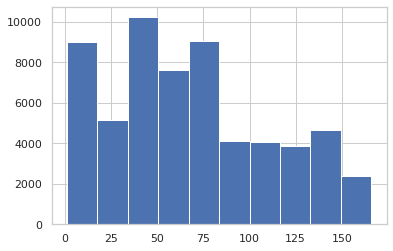

In [ ]:
merged_df['IDRoute'].hist()

####linkid

In [ ]:
len(set(merged_df['linkid']))

9327

####Region_of_origin

In [ ]:
set(merged_df['Region_of_Origin'])

{'R1 - AM Lisboa', 'R2 - AM Porto'}

In [ ]:
n = merged_df.shape[0]
print('R1 - AM Lisboa ',len(merged_df[merged_df['Region_of_Origin']=='R1 - AM Lisboa'])/n*100)
print('R2 - AM Porto ',len(merged_df[merged_df['Region_of_Origin']=='R2 - AM Porto'])/n*100)

R1 - AM Lisboa  75.70495671391303
R2 - AM Porto  24.29504328608697


####District of origin

In [ ]:
set(merged_df['District_of_Origin'])

{'Aveiro', 'Lisboa', 'Porto', 'Setúbal'}

In [ ]:
n = merged_df.shape[0]
print('Aveiro ',len(merged_df[merged_df['District_of_Origin']=='Aveiro'])/n*100)
print('Lisboa ',len(merged_df[merged_df['District_of_Origin']=='Lisboa'])/n*100)
print('Porto ',len(merged_df[merged_df['District_of_Origin']=='Porto'])/n*100)
print('Setúbal ',len(merged_df[merged_df['District_of_Origin']=='Setúbal'])/n*100)



Aveiro  0.17779697911300907
Lisboa  60.979378873730916
Porto  24.11724630697396
Setúbal  14.725577840182117


####county of origin

In [ ]:
c= set(merged_df['County_of_Origin'])
print(c, len(c))

{'Maia', 'Odivelas', 'Cascais', 'Loures', 'Sesimbra', 'Gondomar', 'Sintra', 'Amadora', 'Seixal', 'Oeiras', 'Montijo', 'Setúbal', 'Barreiro', 'Matosinhos', 'Mafra', 'Vila Franca de Xira', 'Almada', 'Santa Maria da Feira', 'Porto', 'Lisboa', 'Palmela', 'Alcochete'} 22


In [ ]:
import plotly.express as px
fig = px.histogram(merged_df, x= 'County_of_Origin')
fig.show()

#### Average_Daily_SeniorPopulation_Travelling



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution')

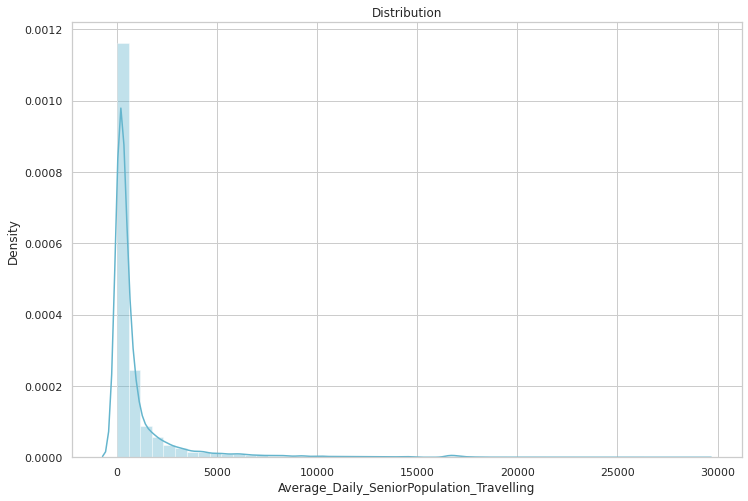

In [ ]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(merged_df['Average_Daily_SeniorPopulation_Travelling'], kde = True, color = 'c')
plt.title('Distribution')

In [ ]:
#sns.boxplot(x='Region_of_Origin', y='Average_Daily_SeniorPopulation_Travelling', data=merged_df)

###Encoding the categorical data

In [ ]:
merged_df_1 = merged_df.copy()
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
merged_df['Region_of_Origin'] = number.fit_transform(merged_df['Region_of_Origin'].astype('str'))
merged_df['County_of_Origin'] = number.fit_transform(merged_df['County_of_Origin'].astype('str'))
merged_df['District_of_Origin'] = number.fit_transform(merged_df['District_of_Origin'].astype('str'))
le_name_mapping = dict(zip(number.classes_, number.transform(number.classes_)))
print(le_name_mapping)

{'Aveiro': 0, 'Lisboa': 1, 'Porto': 2, 'Setúbal': 3}


In [ ]:
merged_df.sample(3)

,IDRoute,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
28534,67,900949565,0,1,7,233.203075
6997,69,537272294,0,1,6,733.823048
9187,10,901125386,0,1,6,230.445379


In [ ]:
merged_df_1.sample(3)

,IDRoute,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
42808,77,900920026,R1 - AM Lisboa,Lisboa,Lisboa,115.577130
19572,8,902120357,R1 - AM Lisboa,Lisboa,Lisboa,232.178668
34502,36,851450552,R1 - AM Lisboa,Lisboa,Oeiras,401.038621


###Finding Correlation 

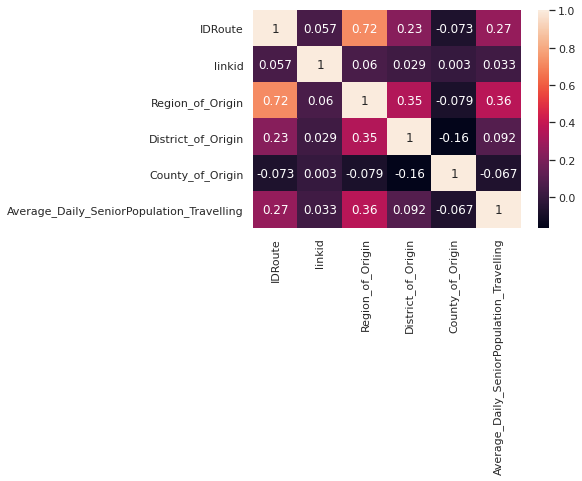

In [ ]:
corrr = merged_df.corr()
sns.heatmap(corrr, annot = True)

#**Pattern Recognition**

Analyzing the relation between columns with positive correlation

In [ ]:
corrr['Average_Daily_SeniorPopulation_Travelling'].sort_values()

County_of_Origin                            -0.066740
linkid                                       0.033072
District_of_Origin                           0.092299
IDRoute                                      0.271006
Region_of_Origin                             0.364833
Average_Daily_SeniorPopulation_Travelling    1.000000
Name: Average_Daily_SeniorPopulation_Travelling, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



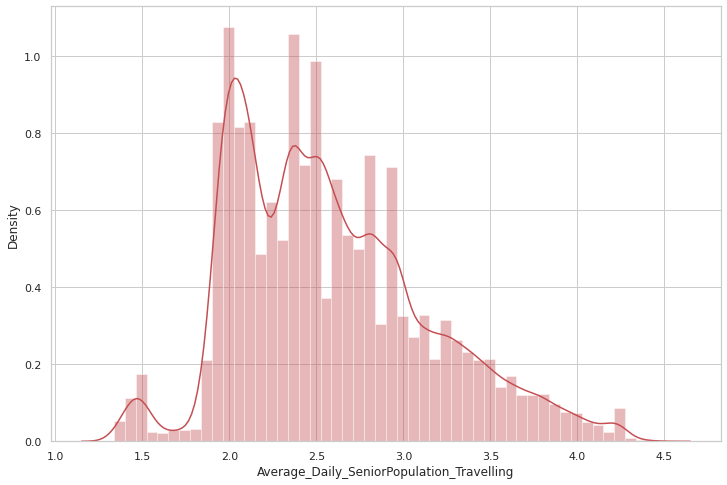

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(merged_df_1['Average_Daily_SeniorPopulation_Travelling']), kde = True, color = 'r' )

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



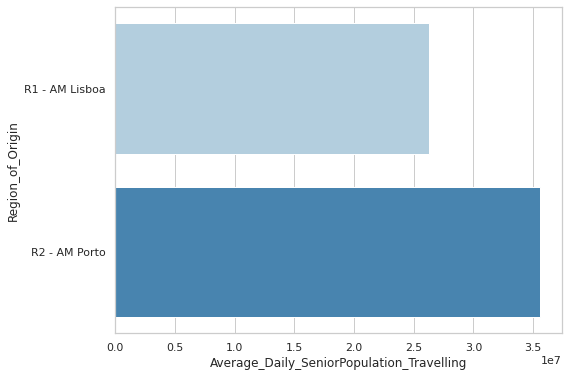

In [ ]:
charges = merged_df_1['Average_Daily_SeniorPopulation_Travelling'].groupby(merged_df_1.Region_of_Origin).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head(), charges.head().index, palette='Blues')

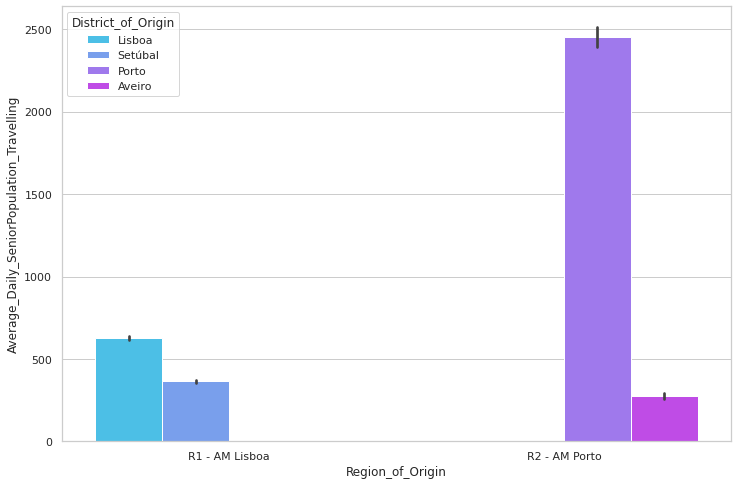

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Region_of_Origin', y='Average_Daily_SeniorPopulation_Travelling', hue='District_of_Origin', data=merged_df_1, palette='cool')

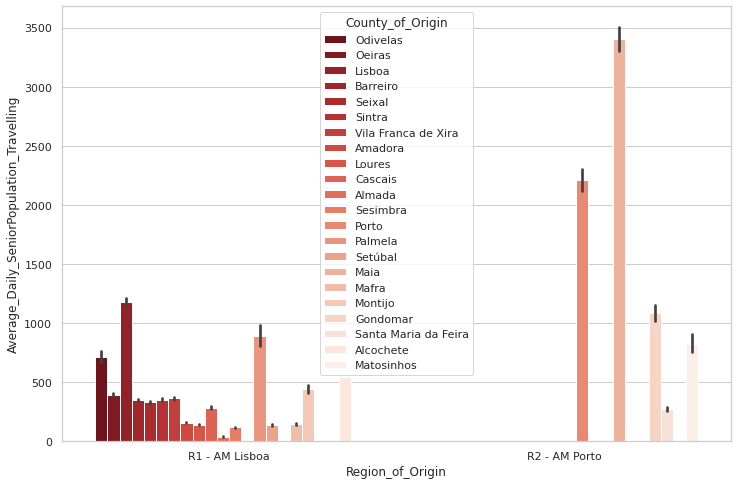

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Region_of_Origin', y='Average_Daily_SeniorPopulation_Travelling', hue='County_of_Origin', data=merged_df_1, palette='Reds_r')

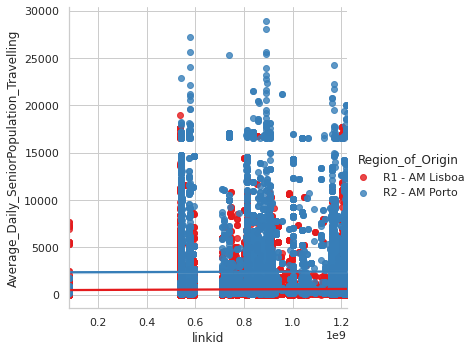

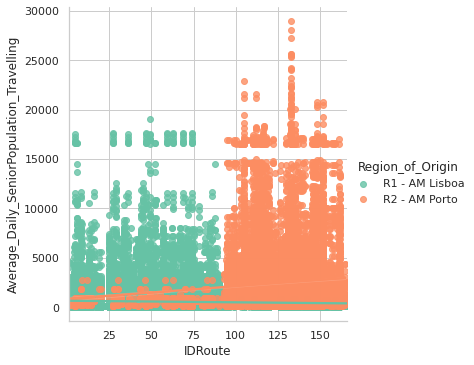

In [ ]:
ax = sns.lmplot(x = 'linkid', y = 'Average_Daily_SeniorPopulation_Travelling', data=merged_df_1, hue='Region_of_Origin', palette='Set1')
ax = sns.lmplot(x = 'IDRoute', y = 'Average_Daily_SeniorPopulation_Travelling', data= merged_df_1, hue='Region_of_Origin', palette='Set2')

In [ ]:
fig = px.scatter_3d(merged_df_1, x = 'IDRoute', y = 'District_of_Origin', z = 'Average_Daily_SeniorPopulation_Travelling', color = 'Region_of_Origin')
fig.show()

###Developing a model

In [ ]:
merged_df = merged_df.drop(columns= ['County_of_Origin'])

In [ ]:
X = merged_df.drop(columns= ['Average_Daily_SeniorPopulation_Travelling'])
y = merged_df['Average_Daily_SeniorPopulation_Travelling']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

**Linear Regression**

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

lin = LinearRegression().fit(X_train, y_train)

y_pred = lin.predict(X_test)
print('Coefficients:', lin.coef_)
print('Intercept:', lin.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))

Coefficients: [ 7.96946778e-01  6.83238956e-08  1.85962152e+03 -1.11930350e+02]
Intercept: 634.6318408319487
Mean squared error (MSE): 4115962.29
Coefficient of determination (R^2): 0.14


**Polynomial Regression** [link for pr](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)
x_poly_test = polynomial_features.fit_transform(X_test)
model = LinearRegression()
model.fit(x_poly, y_train)
y_poly_pred = model.predict(x_poly_test)
rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)
print(rmse)
print(r2)

2035.5323628841204
0.13104969084442641


**Principal Component regression**
[link text](https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py)

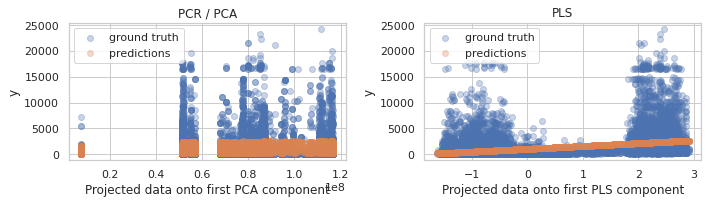

PCR r-squared 0.107
PLS r-squared 0.119
PCR r-squared with 2 components 0.074


In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
pca = PCA(n_components=2).fit(X)
pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps['pca']  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[0].scatter(pca.transform(X_test), pcr.predict(X_test), alpha=.3,
                label='predictions')
axes[0].set(xlabel='Projected data onto first PCA component',
            ylabel='y', title='PCR / PCA')
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[1].scatter(pls.transform(X_test), pls.predict(X_test), alpha=.3,
                label='predictions')
axes[1].set(xlabel='Projected data onto first PLS component',
            ylabel='y', title='PLS')
axes[1].legend()
plt.tight_layout()
plt.show()
print(f"PCR r-squared {pcr.score(X_test, y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, y_test):.3f}")
pca_2 = make_pipeline(PCA(n_components=2), LinearRegression())
pca_2.fit(X_train, y_train)
print(f"PCR r-squared with 2 components {pca_2.score(X_test, y_test):.3f}")

**Partial Least Squares Regression**

In [ ]:
from sklearn import tree
dec = tree.DecisionTreeRegressor(max_depth=1)
dec.fit(X_train,y_train)
#y1_dec=dec.predict(X_train)
#y1_dec=list(y1_dec)
y2_dec=dec.predict(X_test)
#y2_dec=list(y2_dec)
print(r2_score(y2_dec,y_test))

-5.508658780411337


**Bayesian Regression model**

In [ ]:
from sklearn import linear_model
reg = linear_model.BayesianRidge()
reg.fit(X_train,y_train)
y1_reg=reg.predict(X_train)
y1_reg=list(y1_reg)
y2_reg=reg.predict(X_test)
#y2_reg=list(y2_reg)
print("Bayesian Regression r-squared{0}",format(r2_score(y2_reg, y_test)))

Bayesian Regression r-squared{0} -5.430450681003658


###Taking input from user

In [ ]:
#@title User Input
user_input_idroute =  1#@param {type:"integer"}
user_input_linkid =  1#@param {type:"integer"}
user_input_region_of_origin = "R1 - AM Lisboa" #@param ["R1 - AM Lisboa", "R2 - AM Porto"]
user_input_district_of_origin = 'Aveiro' #@param ['Aveiro', 'Lisboa', 'Porto', 'Setúbal']
user_input_county_of_origin = 'Amadora' #@param ['Amadora', 'Vila Franca de Xira', 'Gondomar', 'Lisboa', 'Odivelas', 'Setúbal', 'Palmela', 'Santa Maria da Feira', 'Alcochete', 'Sesimbra', 'Oeiras', 'Porto', 'Maia', 'Cascais', 'Matosinhos', 'Sintra', 'Barreiro', 'Montijo', 'Almada', 'Loures', 'Mafra', 'Seixal']


In [ ]:
user_input = {'IDRoute': [user_input_idroute], 'linkid': [user_input_linkid] , 'Region_of_Origin': [user_input_region_of_origin], 'District_of_Origin': [user_input_district_of_origin],
       'County_of_Origin': [user_input_county_of_origin]}

Performing all the preprocessing done on dataframe here: Encoding, dropping columns

In [ ]:
user_input = pd.DataFrame(user_input)
user_input

,IDRoute,linkid,Region_of_Origin,District_of_Origin,County_of_Origin
0,1,1,R1 - AM Lisboa,Aveiro,Amadora


Using the model with highest accuracy to predict the value

In [ ]:
user_input['Region_of_Origin'] = user_input['Region_of_Origin'].apply(lambda x: 1 if x=='R2 - AM Porto' else 0)
user_input['District_of_Origin'] = user_input['District_of_Origin'].apply(lambda x: 1 if x=='Lisboa' else (2 if x=='Porto' else (3 if x=='Setúbal' else 0)))
user_input = user_input.drop(columns= ['County_of_Origin'])

In [ ]:
print(lin.predict(user_input))

[635.42878768]


If the Average_Daily_SeniorPopulation_Travelling is known for given user input we can add the data to merged dataframe

In [ ]:
#@title Is the output "Average_Daily_SeniorPopulation_Travelling" known for given input
user_input_target =  'Yes' #@param ['Yes','No']

In [ ]:
if user_input_target == 'Yes':
  #@title "Average_Daily_SeniorPopulation_Travelling" known for given input
  user_input_target =  "1000" #@param {type:"string"}
  user_input_target = float(user_input_target)
  user_input['Average_Daily_SeniorPopulation_Travelling'] = user_input_target
  merged_df.append(user_input, ignore_index=True)